In [88]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
from datetime import datetime
#df = pd.Series.from_csv('fxpo2.csv',header=0)
df = pd.read_csv('fxpo2.csv').dropna()
df.tail()

,date,FXPO.L.Open,FXPO.L.High,FXPO.L.Low,FXPO.L.Close,FXPO.L.Volume,FXPO.L.Adjusted
2658,2017-12-18,268.299988,282.200012,263.200012,281.100006,3280032.0,281.100006
2659,2017-12-19,278.299988,285.899994,277.600006,281.399994,5269426.0,281.399994
2660,2017-12-20,281.200012,292.399994,279.200012,285.399994,2069135.0,285.399994
2661,2017-12-21,286.500000,294.700012,283.399994,289.000000,2916102.0,289.000000
2662,2017-12-22,289.600006,296.799988,287.100006,287.799988,1151210.0,287.799988


In [113]:
start = 2300
X = np.arange(start,len(df)).reshape(-1, 1)
y = df['FXPO.L.Close'][start:]

In [138]:
quadratic = PolynomialFeatures(degree=4)
X_quad = quadratic.fit_transform(X)

In [139]:
from sklearn.linear_model import LinearRegression
pr = LinearRegression()
pr.fit(X_quad,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [140]:
cont = np.arange(2300,2700)[:, np.newaxis]
y_pr = pr.predict(quadratic.fit_transform(cont))

<IPython.core.display.Javascript object>


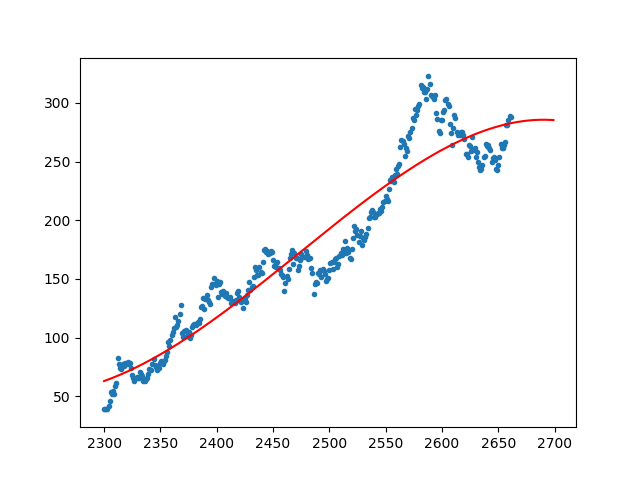

In [141]:
%matplotlib notebook
from matplotlib import pyplot as plt
plt.plot(cont,y_pr,color='red')
plt.scatter(X,y,marker=".")

In [10]:
print(y_pr[2660])

IndexError: index 2660 is out of bounds for axis 0 with size 1200